# This solution is related to the Problem Statement 1 for Survey Buddy Internship.

I have used alexa_reviews dataset(from rows 0 to 2000) from Kaggle for demonstration. I will be using Rake, Rake-nltk and Gensim for solution.

In [263]:
#Importing basic libraries
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [264]:
#Loading dataset
df1=pd.read_csv('amazon_alexa.tsv', sep='\t')
df=df1[0:2000]
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
rating              2000 non-null int64
date                2000 non-null object
variation           2000 non-null object
verified_reviews    2000 non-null object
feedback            2000 non-null int64
dtypes: int64(2), object(3)
memory usage: 78.2+ KB


In [266]:
lens=df['verified_reviews'].unique()
len(lens)

1565

In [267]:
l=df['verified_reviews'].value_counts()
l[0:40]

#I think longer statements repeating twice or thrice might be a data repetition problem. It can be worked upon.

                                                                                                                                                                                                                                                                                                                                                                                                                                                 37
Love it!                                                                                                                                                                                                                                                                                                                                                                                                                                         17
Love it                                                                                                                         

In [268]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [269]:
#Text preprocessing
#Step 1: Transforming to lowercase

df['reviews_lc']=df['verified_reviews'].str.lower()
df['reviews_lc'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: reviews_lc, dtype: object

In [270]:
#Step 2: Removing stopwords and punctuation
import nltk
from nltk.corpus import stopwords

sw=stopwords.words('english')

In [271]:
import re
from nltk.tokenize import word_tokenize

def transform_text(s):
    
    #remove tags
    s=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",s)
    
    # remove special characters and digits
    s=re.sub("(\\d|\\W)+"," ",s)
    
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
 
    s = ' '.join(new_string)
    
    return s.strip()

In [272]:
df['reviews_sw'] = df['reviews_lc'].apply(transform_text)
df['reviews_sw'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing old learns dinosaurs control lig...
4                                                music
Name: reviews_sw, dtype: object

In [273]:
#Step 3: Lemmatizing
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()

In [274]:
df['reviews_lm'] = df['reviews_sw'].apply(lemmatizer_text)
df['reviews_lm'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn dinosaurs control ligh...
4                                                music
Name: reviews_lm, dtype: object

In [275]:
#Step 4: Removing rare words
text = ' '.join(df['reviews_lm'])
len(text)

165864

In [276]:
text_series=pd.Series(text.split())
freq_comm = text_series.value_counts()
rare_words = freq_comm[freq_comm==1]
len(rare_words)

1027

In [277]:
rare_words

cams            1
tailor          1
tablets         1
grant           1
unacceptable    1
               ..
viola           1
inability       1
pant            1
softly          1
karen           1
Length: 1027, dtype: int64

In [278]:
# Removing 1027 rare occuring words 
df['reviews_lm1'] = df['reviews_lm'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))
df['reviews_lm1'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn control light play gam...
4                                                music
Name: reviews_lm1, dtype: object

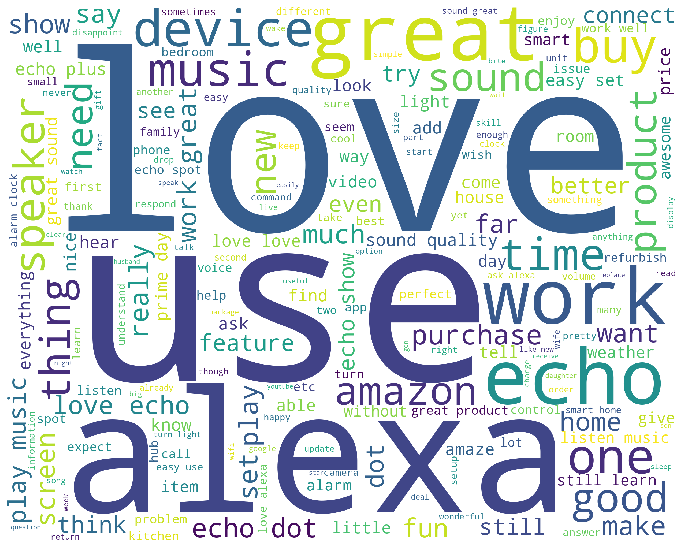

In [279]:
from wordcloud import WordCloud,STOPWORDS

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df['reviews_lm1']))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [280]:
# 1. Using Rake library
import RAKE

In [281]:
%%time
rake_obj=RAKE.Rake(sw)
k1=[]

for i in range(0,len(df['reviews_lm1'])):
    k1.append(rake_obj.run(df['reviews_lm1'][i], maxWords=3))

Wall time: 529 ms


In [282]:
def Sort_tuple(tup):
    tup.sort( key = lambda x: x[1],reverse=True)
    return tup

In [283]:
k1_list = [item for sublist in k1 for item in sublist]
k1_list=Sort_tuple(k1_list)
k1_list

[('love love love', 9.0),
 ('love wife hat', 9.0),
 ('sound great love', 9.0),
 ('like google better', 9.0),
 ('work sound great', 9.0),
 ('outlet work disappoint', 9.0),
 ('alexa else say', 9.0),
 ('awesome understand kid', 9.0),
 ('sad joke worthless', 9.0),
 ('love great product', 9.0),
 ('still discover echo', 9.0),
 ('speaker sound good', 9.0),
 ('work absolutely great', 9.0),
 ('buy wife love', 9.0),
 ('easy use amaze', 9.0),
 ('easy set issue', 9.0),
 ('impress sound quality', 9.0),
 ('love pretty cool', 9.0),
 ('alexa hardly come', 9.0),
 ('five need say', 9.0),
 ('awesome love alexa', 9.0),
 ('love work well', 9.0),
 ('refurbish work great', 9.0),
 ('sound work great', 9.0),
 ('love great fun', 9.0),
 ('get mom love', 9.0),
 ('great like new', 9.0),
 ('please order want', 9.0),
 ('love echo dot', 9.0),
 ('love great product', 9.0),
 ('work good satisfy', 9.0),
 ('work like new', 9.0),
 ('add room convenience', 9.0),
 ('cant figure use', 9.0),
 ('work advertise thank', 9.0),
 (

# 1. Results

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

I think it is fast and easy and we see some good results. However, I also notice some repeated keyphrases. More work can be done on this.

In [284]:
# 2. Using Rake-nltk
from rake_nltk import Rake

r=Rake(max_length=3)

In [285]:
%%time
r.extract_keywords_from_sentences(df['reviews_lm1'])

Wall time: 48.8 ms


In [286]:
k2=r.get_ranked_phrases_with_scores()[0:20]

In [287]:
k2

[(9.0, 'video call mom'),
 (9.0, 'think read mind'),
 (9.0, 'size screen thing'),
 (9.0, 'sad joke worthless'),
 (9.0, 'meet every expectation'),
 (9.0, 'item speak spanish'),
 (9.0, 'hand free control'),
 (9.0, 'extremely low volume'),
 (9.0, 'enough video options'),
 (9.0, 'add room convenience'),
 (8.833333333333334, 'use alarm clock'),
 (8.666666666666666, 'still price right'),
 (8.625, 'tube buy know'),
 (8.625, 'thing ever buy'),
 (8.625, 'live without alexa'),
 (8.625, 'alexa pretty dumb'),
 (8.625, 'alexa else say'),
 (8.615384615384615, 'slow compare echo'),
 (8.615384615384615, 'change voice echo'),
 (8.568627450980392, 'love wife hat')]

# 2. Results

RAKE-NLTK is a modified version that uses the natural language processing toolkit.

It is very fast but we see some different and useful results.


In [288]:
# 3. Using gensim
import gensim

In [289]:
%%time
k3=[]

for i in range(0,len(df['reviews_lm1'])):
    k3.append(gensim.summarization.keywords(df['reviews_lm1'][i],        
             split=True,              
             scores=True,            
             pos_filter=('NN', 'JJ'),
             lemmatize=False,         
             deacc=True))

Wall time: 6.55 s


In [290]:
k3_list = [item for sublist in k3 for item in sublist]
k3_list=Sort_tuple(k3_list)
k3_list

[('great', 0.7925789920302361),
 ('great', 0.7925789920302355),
 ('echo', 0.7313954180316474),
 ('echo', 0.7313954180316473),
 ('use', 0.7288857662234047),
 ('love', 0.7288857662234045),
 ('great', 0.7188483694075956),
 ('useful', 0.7186513788977735),
 ('use', 0.7186513788977735),
 ('google', 0.7032078297389297),
 ('new', 0.7032078297389295),
 ('set', 0.6829189345613338),
 ('devices', 0.6747073060501636),
 ('device', 0.6747073060501636),
 ('love', 0.6744832684273775),
 ('love', 0.6744832684273773),
 ('clock', 0.66139533778859),
 ('work', 0.6525526168597),
 ('good', 0.6525526168596999),
 ('like', 0.6525526168596999),
 ('work', 0.6525526168596998),
 ('need', 0.6525526168596998),
 ('refurbish', 0.6525526168596996),
 ('prime', 0.6525526168596991),
 ('pretty', 0.6514106560363311),
 ('pretty', 0.651410656036331),
 ('use', 0.6442627476729983),
 ('device', 0.6341174410600102),
 ('kitchen', 0.6329549733996177),
 ('enter', 0.6329549733996175),
 ('music', 0.632954973399617),
 ('question', 0.63295

# 3. Results

Gensim is an open-source library for natural language processing, using modern statistical machine learning.

It took a lot of time when compared with above libraries and also did not give very good results.
